In [166]:
import os 



In [167]:
import numpy as np 

user_moview_matrix= np.array([
    [4, 0, 5, 0],
    [0, 3, 0, 2],
    [5, 4, 0, 3]
])

user_moview_matrix

array([[4, 0, 5, 0],
       [0, 3, 0, 2],
       [5, 4, 0, 3]])

In [168]:
## aply SVD 
U , s ,V = np.linalg.svd(user_moview_matrix , full_matrices= False)
U , 

(array([[ 0.55366532, -0.79827961,  0.23707463],
        [ 0.25209279,  0.4320076 ,  0.8659207 ],
        [ 0.79366488,  0.41966545, -0.44042816]]),)

In [169]:
s

array([8.34682463, 5.52139049, 1.9608074 ])

In [170]:
V

array([[ 0.74075902,  0.4709501 ,  0.33166224,  0.34566201],
       [-0.19828179,  0.53875643, -0.72289726,  0.38450669],
       [-0.63945205,  0.4263802 ,  0.60453318,  0.20938156]])

In [171]:
!uv pip install kagglehub

Using Python 3.11.8 environment at: D:\ujjwal\Building-LLMs-for-Production\.venv
Audited 1 package in 7ms


In [172]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan4050/movie-recommendation-data")

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/rohan4050/movie-recommendation-data (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F8A7D3E710>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

The reason for using a dataset with a textual description of each movie (alongside information such as ratings and movie titles) is so that we can get the embeddings of the text

## Data Preprocessing 

 dataset we are using

•	Genres: A list of applicable genres for the movie.

•	Title: The movie’s title.

•	Overview: Textual description of the plot.

•	Vote_average: A rating from 1 to 10 for a given movie

•	Vote_count: The number of votes for a given movie


In [ ]:
import pandas as pd 

In [173]:
df = pd.read_csv(r'data/movies_metadata.csv')
df.head()

C:\Users\ujjwal\AppData\Local\Temp\ipykernel_1648\2033083470.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [174]:
df['genres'].sample()

19649    [{'id': 99, 'name': 'Documentary'}]
Name: genres, dtype: object

In [175]:
df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

the data is in list but in string format  like  "[a , b ,c ]"   so we use ast.literal_eval() 

ast.literal_eval is a function in Python that safely turns a string version of simple Python data (like lists, dictionaries, numbers, or strings) back into real Python objects.



In [176]:
import ast 


ast.literal_eval(df['genres'][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [177]:
## converting string representation of the dictionary to actual dictionaries
df['genres'] = df['genres'].apply(ast.literal_eval)

In [178]:
#transforming  the geners column 
df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

### some has list fo id some gernes has only one gernes 


In [179]:
df['genres'][0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [180]:
df['genres'][4]

[{'id': 35, 'name': 'Comedy'}]

In [181]:
## extracting name from gernes 

df['genres'] = df['genres'].apply(lambda x: [geners['name'] for  geners in x ])

In [182]:
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

## Now merge vote average and vote count in single column 

In [183]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [184]:
(df['vote_count'] < 10).sum()

22529

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [185]:
df['vote_count'].mean()

109.89733831940167

In [186]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [187]:
(df['vote_count'] == 0).sum()

2899

In [188]:
md =df 

In [189]:
# Minimum vote count to prevent skewed results
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
min_vote_count = vote_counts.quantile(0.95)
min_vote_count

434.0

so , basically  less vote(review) might get wrong prediction 
say only 1 person vote , and review 5 start that does't mean that moview good 


so from 90% quantile we get values , 434 which means , 
90% value are less than 434 which is our thresold also
we are only considering reviews of moview above 160 votes 

In [190]:
## moviews with more than 160 reviews
df[df['vote_count'] > min_vote_count].sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4178,False,"{'id': 2150, 'name': 'Shrek Collection', 'post...",60000000,"[Adventure, Animation, Comedy, Family, Fantasy]",http://www.shrek.com/,808,tt0126029,en,Shrek,It ain't easy bein' green -- especially if you...,...,2001-05-16,484409218.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest fairy tale never told.,Shrek,False,7.3,4183.0


IMDb moview rating formula 


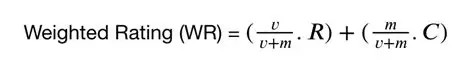

In [191]:
from IPython.display import Image 
Image(r'D:\ujjwal\recomdation_system_using_llm\IMDb moview rating.png')

In [192]:
df['vote_average'].mean() #gloable average 

5.618207215134185

In [193]:
def weighted_rating(vote_count, vote_average, min_vote_count=160.0 , global_average = 5.6):
    """
    vote_count: number of votes for the item (v)
    vote_average: average rating of the item (R)
    min_vote_count: minimum votes required to be listed (m)
    global_average: mean vote across all items (C)
    
    Returns the Weighted Rating (WR).
    """
    v = vote_count
    R = vote_average
    m = min_vote_count
    C = global_average

    return (v / (v + m) * R) + (m / (v + m) * C)


In [194]:
C= df['vote_count'].mean()
C #gloable average

109.89733831940167

In [195]:
## new column 'weighted rate'

df['vote_count']
df['vote_average']

C 

109.89733831940167

In [196]:


df['weighted_rate'] = df.apply(lambda row:weighted_rating(row['vote_count'] , 
                                     row['vote_average'])  , axis= 1 )
df['weighted_rate'].describe()

count    45460.000000
mean         5.709423
std          0.314534
min          3.580315
25%          5.592593
50%          5.617284
75%          5.702924
max          8.445527
Name: weighted_rate, dtype: float64

<Axes: ylabel='weighted_rate'>

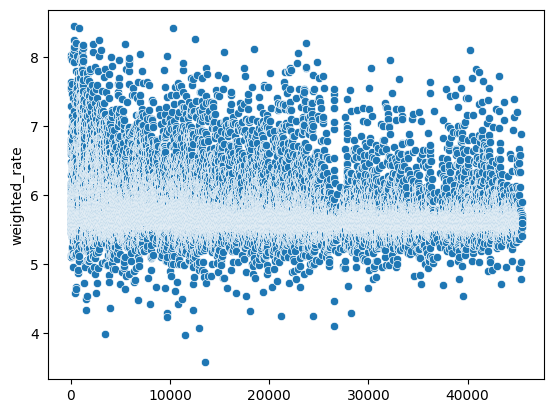

In [197]:
sns.scatterplot(df['weighted_rate'])

In [198]:
## remove null
df = df.dropna()

In [199]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'weighted_rate'],
      dtype='object')

In [200]:
df_final = df[['genres', 'title', 'overview', 'weighted_rate']].reset_index(drop=True)

In [201]:
df['genres'].sample(2)

37411    [Comedy, Drama]
16544    [Comedy, Drama]
Name: genres, dtype: object

In [202]:
df['overview'].sample(2)

2877     A criminal organization has obtained two nucle...
38850    One year after outwitting the FBI and winning ...
Name: overview, dtype: object

In [203]:
df['title'].sample(2)

11311                       Open Season
26566    Guardians of the Galaxy Vol. 2
Name: title, dtype: object

now we combine , title , overview and  gerne 

In [204]:
df['genres'].iloc[0]

['Adventure', 'Action', 'Thriller']

In [205]:
', '.join(df['genres'].iloc[0])

'Adventure, Action, Thriller'

In [206]:
print('title    ' + df['title'].iloc[2] + '\n' + 'overview:   ' + df['overview'].iloc[1]  + '\n' +  'review   '+ str(', '.join(df['genres'].iloc[0])))

title    From Dusk Till Dawn
overview:   Craig and Smokey are two guys in Los Angeles hanging out on their porch on a Friday afternoon, smoking and drinking, looking for something to do.
review   Adventure, Action, Thriller


In [207]:
## code 
df_final['combined_info'] = df_final.apply(lambda row: f"Title: {row['title']}. Overview: {row['overview']} Genres: {', '.join(row['genres'])}. Rating: {row['weighted_rate']}", axis=1)
df_final['combined_info'][9]

'Title: Jurassic Park. Overview: A wealthy entrepreneur secretly creates a theme park featuring living dinosaurs drawn from prehistoric DNA. Before opening day, he invites a team of experts and his two eager grandchildren to experience the park and help calm anxious investors. However, the park is anything but amusing as the security systems go off-line and the dinosaurs escape. Genres: Adventure, Science Fiction. Rating: 7.537451133698201'

for embedding and similarity serach , combied_info is what matters 
and 
for sort or filter recomdation after retrieving similar moviews keepign weighted rating is helpfull 


#### and also keeping , title  ,overview and  generes for ui (say user input by title or we gave output as this title and this overview so need these features)

# EMbedding

In [208]:
import pandas as pd 
import tiktoken 
import os 

from transformers import AutoTokenizer, AutoModel 

In [209]:
#chose a pretrained model tokenizer 
tokenizer=  AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [211]:
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [212]:
import torch 
inputs = tokenizer("hi my name is ujjwal", return_tensors= 'pt')
inputs

{'input_ids': tensor([[  101,  7632,  2026,  2171,  2003,  1057,  3501,  3501, 13476,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [51]:
with torch.no_grad():
    output= model(**inputs)
    

In [213]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1819,  0.4187, -0.0589,  ..., -0.1549, -0.3103,  0.0652],
         [-0.5125,  0.2344, -0.0189,  ...,  0.9736, -0.3711,  0.6047],
         [ 0.3135, -0.8175, -0.0487,  ...,  0.0615, -1.0657, -0.4187],
         ...,
         [-0.2377,  0.4097, -0.2198,  ...,  0.0014, -0.0956,  0.1823],
         [-0.2346,  0.7368, -0.4079,  ..., -0.0323,  0.0841,  0.8296],
         [-0.0122,  0.0890, -0.1920,  ..., -0.2752, -0.0266, -0.0849]]]), pooler_output=tensor([[-1.0156e-01, -3.5590e-02, -3.2717e-02,  1.0110e-01,  3.5727e-02,
         -7.5193e-02,  4.4627e-02,  2.0956e-02, -1.3922e-01, -8.0553e-03,
          3.9005e-02, -3.7775e-02, -2.3436e-02,  4.1138e-02, -1.0346e-02,
          1.0084e-01,  1.3566e-01,  1.1601e-03, -2.1056e-02,  3.4974e-02,
          1.0418e-02,  2.2966e-02, -8.2811e-03, -1.6013e-02,  6.4974e-02,
          1.4338e-01,  2.3426e-03,  8.1440e-03, -4.0608e-02,  1.3062e-01,
          3.9000e-02,  4.7141e-02, -

In [214]:
text = df_final['combined_info'].tolist() #convert panda series to text
len(text)

693

In [215]:
inputs= tokenizer(text , 
          return_tensors="pt",
          truncation=True,
          padding= True, 
          max_length = 512)

inputs 

{'input_ids': tensor([[ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        ...,
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [216]:
len(inputs['input_ids'])

693

In [217]:
df_final['n_tokens'] = df_final.combined_info.apply(lambda X: (tokenizer(X , return_tensors= 'pt')['input_ids']).shape[1])
df_final

,genres,title,overview,weighted_rate,combined_info,n_tokens
0,"[Adventure, Action, Thriller]",GoldenEye,James Bond must unmask the mysterious head of ...,6.481832,Title: GoldenEye. Overview: James Bond must un...,62
1,[Comedy],Friday,Craig and Smokey are two guys in Los Angeles h...,6.667162,Title: Friday. Overview: Craig and Smokey are ...,55
2,"[Horror, Action, Thriller, Crime]",From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,6.784701,Title: From Dusk Till Dawn. Overview: Seth Gec...,109
3,[Comedy],Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",5.778723,Title: Blue in the Face. Overview: Auggie runs...,89
4,"[Action, Adventure, Science Fiction, Family, F...",Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,5.404473,Title: Mighty Morphin Power Rangers: The Movie...,91
...,...,...,...,...,...,...
688,"[Drama, Science Fiction, War]",War for the Planet of the Apes,Caesar and his apes are forced into a deadly c...,6.604087,Title: War for the Planet of the Apes. Overvie...,125
689,[Comedy],Goon: Last of the Enforcers,"During a pro lockout, Doug ""The Thug"" Glatt is...",5.671795,Title: Goon: Last of the Enforcers. Overview: ...,79
690,"[Adventure, Fantasy, Animation, Action, Family]",Pokémon: Spell of the Unknown,When Molly Hale's sadness of her father's disa...,5.789474,Title: Pokémon: Spell of the Unknown. Overview...,124
691,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",6.140000,Title: Transformers: The Last Knight. Overview...,76


In [94]:
with torch.no_grad():
    embedding_array= model(**inputs)

In [218]:
## making copy of embedding incase if i mistakly do anythign wrong with embedding_array 
embedding_copy = embedding_array.copy() 


In [221]:
## converting into numpy to store in data france , because all of its flexiable and all of our data in dataframe is in , df 

embedding_numpy = embedding_array.last_hidden_state.numpy()

In [222]:
embedding_numpy.shape

(693, 349, 384)

so their is 693 sentences , 349 tokens of 384 dimnetion 
say for 

sentence = "I am very good"

tokens is = ["[CLS]", "i", "am", "very", "good", "[SEP]"]

so embeddding is 
tensor of shape: [1 sentence, 6 tokens, 384 dims] → shape = [1, 6, 384]





now torch.Size([693, 349, 384]) 
for a sentence  say i am very good, 
we have ["[CLS]", "i", "am", "very", "good", "[SEP]"]

i.e 6 tokens now 
we want to represent a hole sentence by one vector so we are doing mean

In [223]:
embedding_numpy = embedding_numpy.mean(axis=1) # shape: [693, 384] 
embedding_numpy.shape


(693, 384)

In [224]:
embedding_numpy

array([[-0.19643553, -0.08661386,  0.21602945, ..., -0.25122502,
        -0.33632895,  0.06539772],
       [-0.17898254, -0.2061276 ,  0.14108713, ..., -0.14415035,
        -0.36454177, -0.31518635],
       [-0.11210436,  0.0285191 ,  0.11703064, ..., -0.11924844,
        -0.10108929, -0.08547185],
       ...,
       [-0.28569093, -0.11247236,  0.23833783, ...,  0.00089295,
        -0.15736026, -0.06546038],
       [-0.23081812, -0.16144682,  0.09814534, ...,  0.1278521 ,
        -0.20404774,  0.06403951],
       [-0.12779997, -0.06317351,  0.2321681 , ..., -0.01115447,
        -0.14299175,  0.02294864]], dtype=float32)

In [225]:
final_embedding = embedding_numpy.copy()

In [235]:
df_final['embedding'] =embedding_numpy.tolist()
df_final.head()

,genres,title,overview,weighted_rate,combined_info,n_tokens,embedding
0,"[Adventure, Action, Thriller]",GoldenEye,James Bond must unmask the mysterious head of ...,6.481832,Title: GoldenEye. Overview: James Bond must un...,62,"[-0.19643552601337433, -0.08661386370658875, 0..."
1,[Comedy],Friday,Craig and Smokey are two guys in Los Angeles h...,6.667162,Title: Friday. Overview: Craig and Smokey are ...,55,"[-0.17898254096508026, -0.2061275988817215, 0...."
2,"[Horror, Action, Thriller, Crime]",From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,6.784701,Title: From Dusk Till Dawn. Overview: Seth Gec...,109,"[-0.11210436373949051, 0.028519099578261375, 0..."
3,[Comedy],Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",5.778723,Title: Blue in the Face. Overview: Auggie runs...,89,"[-0.24224744737148285, -0.15072309970855713, 0..."
4,"[Action, Adventure, Science Fiction, Family, F...",Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,5.404473,Title: Mighty Morphin Power Rangers: The Movie...,91,"[-0.24096280336380005, 0.02875164896249771, 0...."


now we add new column to our dataset as embedding_list
buts is on pytorch  and pytroch df is hard to manipulte or serialize to save (csv , json )takes more moeroy and processing overhead 

In [236]:
df_final.rename(columns= {'embedding': 'vector'}, inplace= True)
df_final.rename(columns={'combined_info': 'text'} , inplace= True)


In [237]:
## save models 
df_final.to_pickle("moview_all-MiniLM-L6-v2_token.pkl")

## working with llms 

In [238]:
from langchain.vectorstores import LanceDB 

In [239]:
df = pd.read_pickle('moview_all-MiniLM-L6-v2_token.pkl')
df.head()

,genres,title,overview,weighted_rate,text,n_tokens,vector
0,"[Adventure, Action, Thriller]",GoldenEye,James Bond must unmask the mysterious head of ...,6.481832,Title: GoldenEye. Overview: James Bond must un...,62,"[-0.19643552601337433, -0.08661386370658875, 0..."
1,[Comedy],Friday,Craig and Smokey are two guys in Los Angeles h...,6.667162,Title: Friday. Overview: Craig and Smokey are ...,55,"[-0.17898254096508026, -0.2061275988817215, 0...."
2,"[Horror, Action, Thriller, Crime]",From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,6.784701,Title: From Dusk Till Dawn. Overview: Seth Gec...,109,"[-0.11210436373949051, 0.028519099578261375, 0..."
3,[Comedy],Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",5.778723,Title: Blue in the Face. Overview: Auggie runs...,89,"[-0.24224744737148285, -0.15072309970855713, 0..."
4,"[Action, Adventure, Science Fiction, Family, F...",Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,5.404473,Title: Mighty Morphin Power Rangers: The Movie...,91,"[-0.24096280336380005, 0.02875164896249771, 0...."


In [240]:
df['text'][0]

'Title: GoldenEye. Overview: James Bond must unmask the mysterious head of the Janus Syndicate and prevent the leader from utilizing the GoldenEye weapons system to inflict devastating revenge on Britain. Genres: Adventure, Action, Thriller. Rating: 6.4818316100443125'

In [241]:
from langchain.document_loaders import UnstructuredHTMLLoader 
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter 
from langchain.vectorstores import LanceDB

 
from langchain.chains import RetrievalQA 
from langchain_huggingface import ChatHuggingFace , HuggingFacePipeline 
from langchain_huggingface import HuggingFaceEmbeddings 

mode_name= 'sentence-transformers/all-MiniLM-L6-v2'

embedding = HuggingFaceEmbeddings(
    model_name= mode_name,
    model_kwargs= {'device':'cuda'},
)


In [242]:
import lancedb 

uri = "vector_data/sample-lancedb"
db= lancedb.connect(uri)

table_name = "mov"

db.create_table(name =  table_name, data=df_final, mode="overwrite")

db.table_names()

['mov', 'movies', 'moview', 'moviews']

In [243]:
table = db.open_table('mov')


In [244]:
docsearch = LanceDB(connection = db , embedding= embedding, vector_key="vector"  , table_name= table_name)

query = "action action action"
docsearch.similarity_search(query )


[Document(metadata={}, page_content='Title: La Vérité si je Mens ! 3. Overview: Eddie, Dov, Yvan et les autres… Nos chaleureux amis ont migré du Sentier moribond à la banlieue florissante d’Aubervilliers… Là où les vieux entrepreneurs juifs ont laissé le terrain à de jeunes grossistes chinois courageux et dynamiques…\n La petite bande est toujours aussi soudée, solidaire que lors des épisodes précédents, et la vie suit son cours, au gré des petits évènements familiaux et des affaires.\n Dov semble toujours frivole, Eddie entreprenant, Yvan transi, Karine désinvolte, Sandra résolue, Chochana naïve, Serge irresponsable et mythomane. Quant à Patrick, il est amoureux et l’heureuse élue est loin d’être facile d’accès.\n Tout irait pour le mieux jusqu’à ce qu’un vent mauvais apporte son lot d’adversité compromettant sérieusement la cohésion du groupe.\n Succomberont-ils sous l’orage à la zizanie, ou bien, une fois de plus, à force d’entraide, de ruses et d’habileté, triompheront-ils de la cr